In [31]:
import os
import sys

sys.path.append(os.path.join('..'))
from models import *

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Dataset rings5-regular

In [32]:
def train_initialy(model):
    model.train(epochs=1000, batch=True, learning_rate=0.01, save_till_best=True)

def train_model(model):
    model.train(epochs=1000, batch=True, learning_rate=0.001, optimizer="rmsprop", rms_beta=0.9, save_till_best=True)
    model.train(epochs=2000, batch=True, learning_rate=0.001, optimizer="rmsprop", rms_beta=0.9, save_till_best=True)
    model.train(epochs=1000, batch=True, batch_size=10, learning_rate=0.001, optimizer="rmsprop", rms_beta=0.99, save_till_best=True)
    model.train(epochs=2000, batch=True, batch_size=100, learning_rate=0.001, optimizer="rmsprop", rms_beta=0.999, save_till_best=True)
    model.train(epochs=1000, batch=True, batch_size=24, learning_rate=0.001, optimizer="rmsprop", rms_beta=0.9999, save_till_best=True)
    model.train(epochs=1000, batch=True, batch_size=10, learning_rate=0.001, optimizer="rmsprop", rms_beta=0.9999, save_till_best=True)

In [33]:
dataset_name = 'rings5-regular'
last_layer_activation_func = Sigmoid()
loss_func = "cross_entropy"
target_precision = 1e-6
models = [
    MLP(
        architecture=MLPArchitecture(2, [80], 5),
        dataset_name=dataset_name,
        data_dir='../data',
        activation_func=Tanh(),
        last_layer_activation_func=last_layer_activation_func,
        loss_function=loss_func,
        initializer=XavierNormalInitializer(),
        target_precision=target_precision,
        name="[80] - tanh"
    ),
    MLP(
        architecture=MLPArchitecture(2, [40, 40], 5),
        dataset_name=dataset_name,
        data_dir='../data',
        activation_func=Tanh(),
        last_layer_activation_func=last_layer_activation_func,
        loss_function=loss_func,
        target_precision=target_precision,
        initializer=XavierNormalInitializer(),
        name="[40, 40] - tanh"
    ),
    MLP(
        architecture=MLPArchitecture(2, [20, 40, 20], 5),
        dataset_name=dataset_name,
        data_dir='../data',
        activation_func=Tanh(),
        last_layer_activation_func=last_layer_activation_func,
        loss_function=loss_func,
        target_precision=target_precision,
        initializer=XavierNormalInitializer(),
        name="[20, 40, 20] - sigmoid"
    ),
]

for model in models:
    print(f"Training model: {model.name}")

Training model: [80] - tanh
Training model: [40, 40] - tanh
Training model: [20, 40, 20] - sigmoid


# First look at the dataset

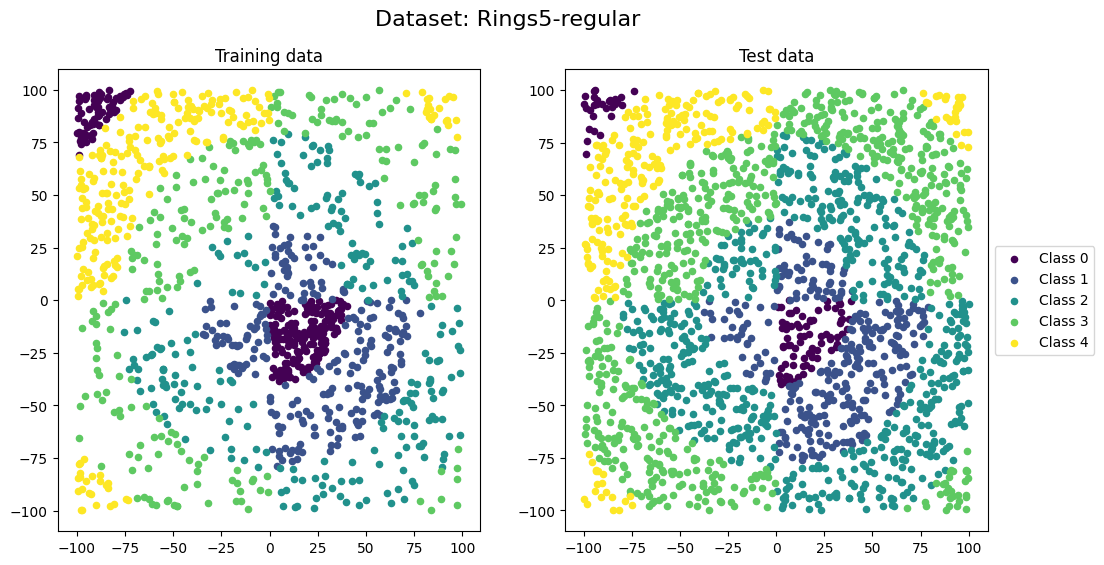

In [34]:
models[0].plot_classification_data()

### Model 1: `[80] - tanh`

In [35]:
model1 = models[0]
train_initialy(model1)

Training from age 0: (best_loss_test: inf, loss_test: 0.774077):   0%|          | 0/1000 [00:00<?, ?it/s]

Training from age 0: (best_loss_test: 0.612556, loss_test: 1.040146): 100%|██████████| 1000/1000 [00:07<00:00, 129.23it/s]

--------------------
Reverting to best model at age 2
Loss on train set: 0.579486	Loss on test set: 0.612556
--------------------
Model training finished at age 2 with loss 0.612556 on test set


Model: [80] - tanh
Age: 2
Train Loss: 0.579486
Test Loss: 0.612556
Accuracy: 0.234
F1 Score: 0.2317
Model made 468 / 2000 correct predictions on the test set.
There were 1532 incorrect predictions.


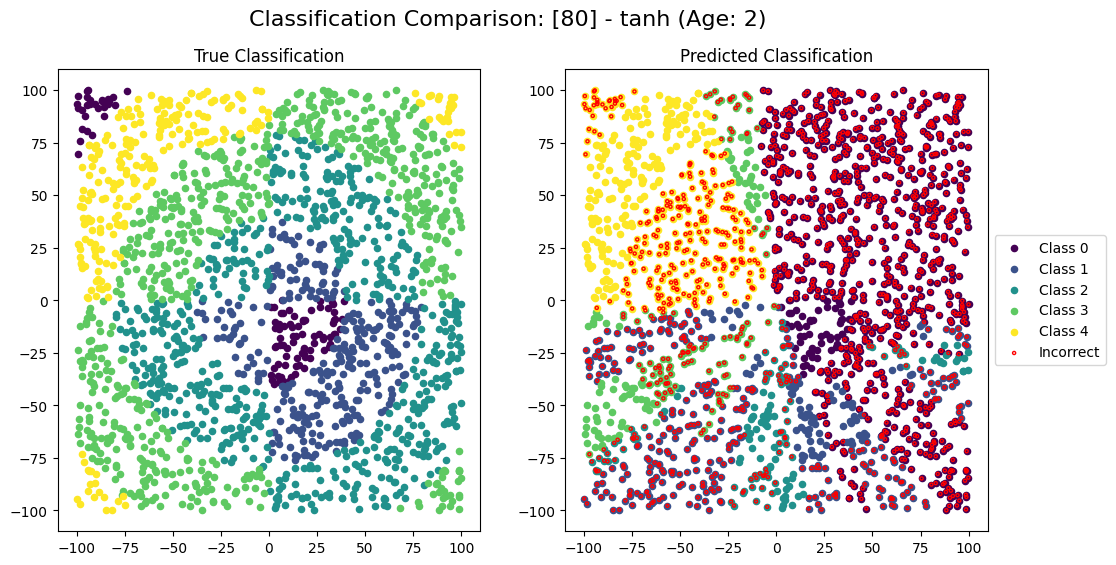

In [36]:
model1.plot_classification_comparison()

In [37]:
train_model(model1)

Training from age 2: (best_loss_test: 0.255543, loss_test: 0.295983): 100%|██████████| 1000/1000 [00:08<00:00, 120.06it/s]


--------------------
Reverting to best model at age 989
Loss on train set: 0.179725	Loss on test set: 0.255543
--------------------
Model training finished at age 989 with loss 0.255543 on test set


Training from age 989: (best_loss_test: 0.175069, loss_test: 0.236815): 100%|██████████| 2000/2000 [00:16<00:00, 121.08it/s]


--------------------
Reverting to best model at age 2633
Loss on train set: 0.09828	Loss on test set: 0.175069
--------------------
Model training finished at age 2633 with loss 0.175069 on test set


Training from age 2633: (best_loss_test: 0.175069, loss_test: 0.349561): 100%|██████████| 1000/1000 [00:14<00:00, 68.91it/s]


--------------------
Reverting to best model at age 2633
Loss on train set: 0.09828	Loss on test set: 0.175069
--------------------
Model training finished at age 2633 with loss 0.175069 on test set


Training from age 2633: (best_loss_test: 0.170955, loss_test: 0.213828): 100%|██████████| 2000/2000 [00:14<00:00, 135.33it/s]


--------------------
Reverting to best model at age 4006
Loss on train set: 0.086718	Loss on test set: 0.170955
--------------------
Model training finished at age 4006 with loss 0.170955 on test set


Training from age 4006: (best_loss_test: 0.153852, loss_test: 0.245566): 100%|██████████| 1000/1000 [00:09<00:00, 102.09it/s]


--------------------
Reverting to best model at age 4183
Loss on train set: 0.084752	Loss on test set: 0.153852
--------------------
Model training finished at age 4183 with loss 0.153852 on test set


Training from age 4183: (best_loss_test: 0.153852, loss_test: 0.281898): 100%|██████████| 1000/1000 [00:14<00:00, 67.98it/s]

--------------------
Reverting to best model at age 4183
Loss on train set: 0.084752	Loss on test set: 0.153852
--------------------
Model training finished at age 4183 with loss 0.153852 on test set


Model: [80] - tanh
Age: 4183
Train Loss: 0.084752
Test Loss: 0.153852
Accuracy: 0.918
F1 Score: 0.9178
Model made 1836 / 2000 correct predictions on the test set.
There were 164 incorrect predictions.


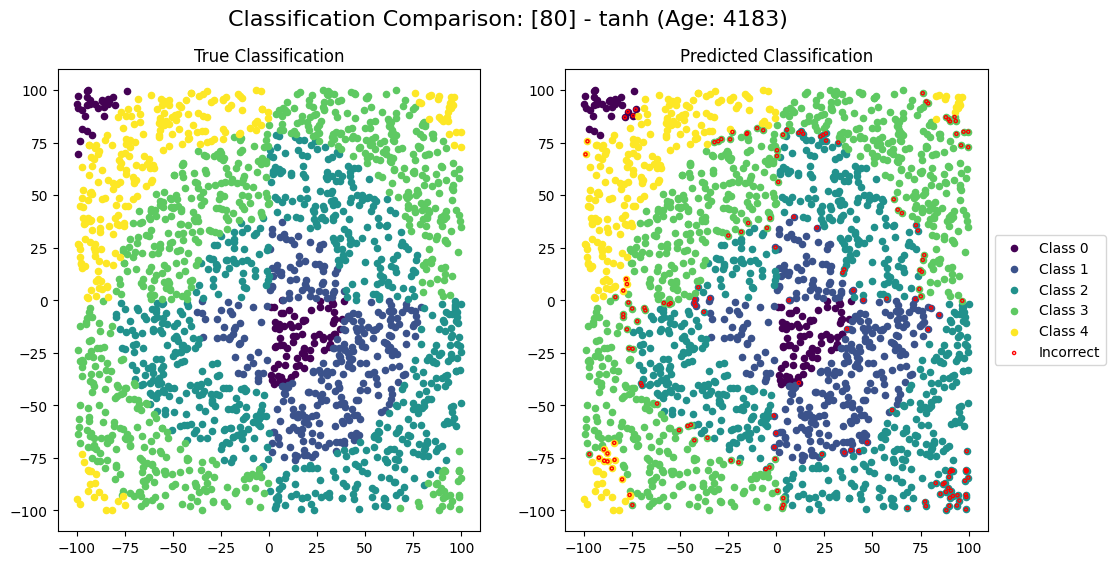

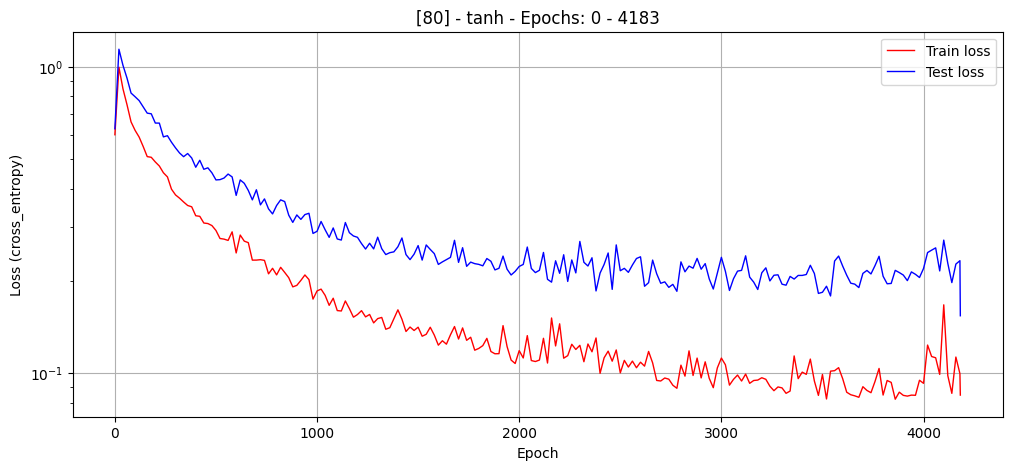

In [38]:
model1.plot_classification_comparison()
model1.plot_history(smoothing_interval=20)

### Model 2: `[40, 40] - tanh`

In [39]:
model2 = models[1]
train_initialy(model2)

Training from age 0: (best_loss_test: 0.670593, loss_test: 0.892314): 100%|██████████| 1000/1000 [00:08<00:00, 113.44it/s]

--------------------
Reverting to best model at age 3
Loss on train set: 0.627347	Loss on test set: 0.670593
--------------------
Model training finished at age 3 with loss 0.670593 on test set


Model: [40, 40] - tanh
Age: 3
Train Loss: 0.627347
Test Loss: 0.670593
Accuracy: 0.265
F1 Score: 0.1901
Model made 530 / 2000 correct predictions on the test set.
There were 1470 incorrect predictions.


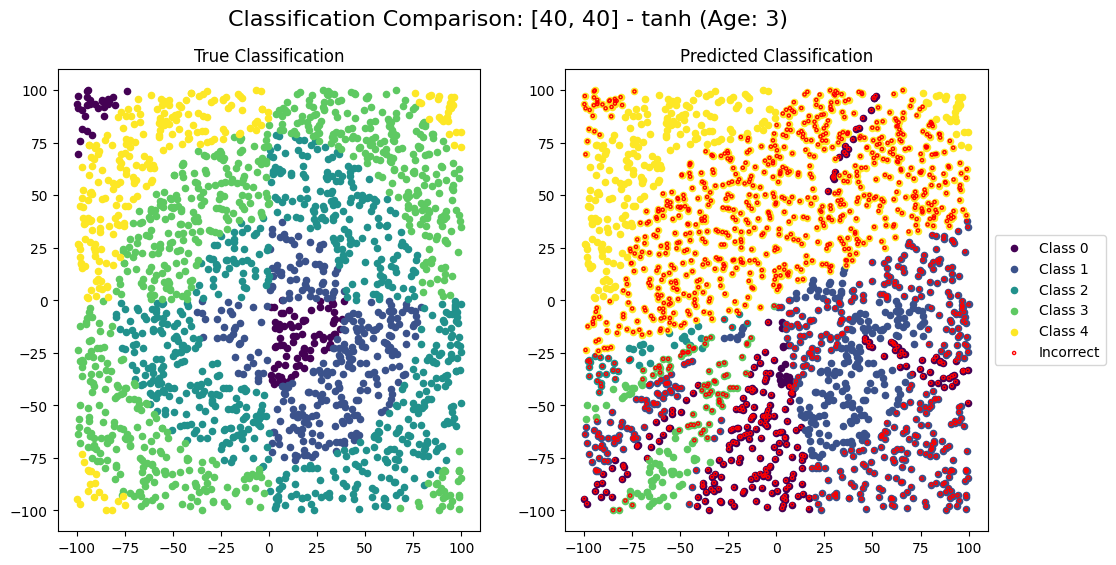

In [40]:
model2.plot_classification_comparison()

In [41]:
train_model(model2)

Training from age 3: (best_loss_test: 0.189212, loss_test: 0.231186): 100%|██████████| 1000/1000 [00:09<00:00, 103.23it/s]


--------------------
Reverting to best model at age 763
Loss on train set: 0.135357	Loss on test set: 0.189212
--------------------
Model training finished at age 763 with loss 0.189212 on test set


Training from age 763: (best_loss_test: 0.175993, loss_test: 0.318242): 100%|██████████| 2000/2000 [00:19<00:00, 104.77it/s]


--------------------
Reverting to best model at age 1222
Loss on train set: 0.125218	Loss on test set: 0.175993
--------------------
Model training finished at age 1222 with loss 0.175993 on test set


Training from age 1222: (best_loss_test: 0.16072, loss_test: 0.200516): 100%|██████████| 1000/1000 [00:19<00:00, 51.36it/s]


--------------------
Reverting to best model at age 1468
Loss on train set: 0.087504	Loss on test set: 0.16072
--------------------
Model training finished at age 1468 with loss 0.16072 on test set


Training from age 1468: (best_loss_test: 0.138914, loss_test: 0.348372): 100%|██████████| 2000/2000 [00:16<00:00, 119.29it/s]


--------------------
Reverting to best model at age 1484
Loss on train set: 0.071385	Loss on test set: 0.138914
--------------------
Model training finished at age 1484 with loss 0.138914 on test set


Training from age 1484: (best_loss_test: 0.138914, loss_test: 0.317574): 100%|██████████| 1000/1000 [00:12<00:00, 78.40it/s]


--------------------
Reverting to best model at age 1484
Loss on train set: 0.071385	Loss on test set: 0.138914
--------------------
Model training finished at age 1484 with loss 0.138914 on test set


Training from age 1484: (best_loss_test: 0.138914, loss_test: 0.200436): 100%|██████████| 1000/1000 [00:20<00:00, 49.58it/s]

--------------------
Reverting to best model at age 1484
Loss on train set: 0.071385	Loss on test set: 0.138914
--------------------
Model training finished at age 1484 with loss 0.138914 on test set


Model: [40, 40] - tanh
Age: 1484
Train Loss: 0.071385
Test Loss: 0.138914
Accuracy: 0.934
F1 Score: 0.9339
Model made 1868 / 2000 correct predictions on the test set.
There were 132 incorrect predictions.


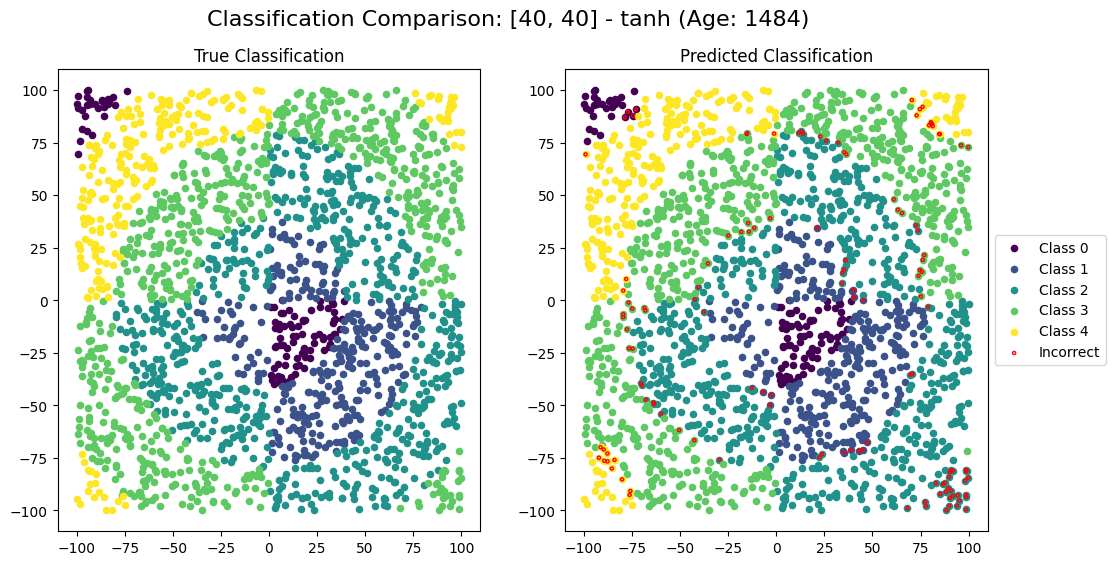

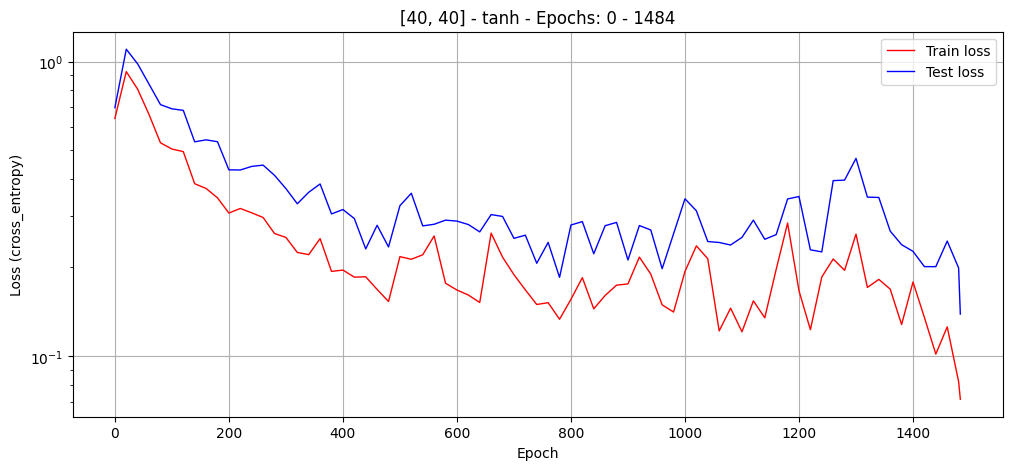

In [42]:
model2.plot_classification_comparison()
model2.plot_history(smoothing_interval=20)

### Model 3: `[20, 40, 20] - sigmoid`

In [43]:
model3 = models[2]
train_initialy(model3)

Training from age 0: (best_loss_test: 0.760686, loss_test: 1.032669): 100%|██████████| 1000/1000 [00:08<00:00, 116.16it/s]

--------------------
Reverting to best model at age 2
Loss on train set: 0.765969	Loss on test set: 0.760686
--------------------
Model training finished at age 2 with loss 0.760686 on test set


Model: [20, 40, 20] - sigmoid
Age: 2
Train Loss: 0.765969
Test Loss: 0.760686
Accuracy: 0.2445
F1 Score: 0.2408
Model made 489 / 2000 correct predictions on the test set.
There were 1511 incorrect predictions.


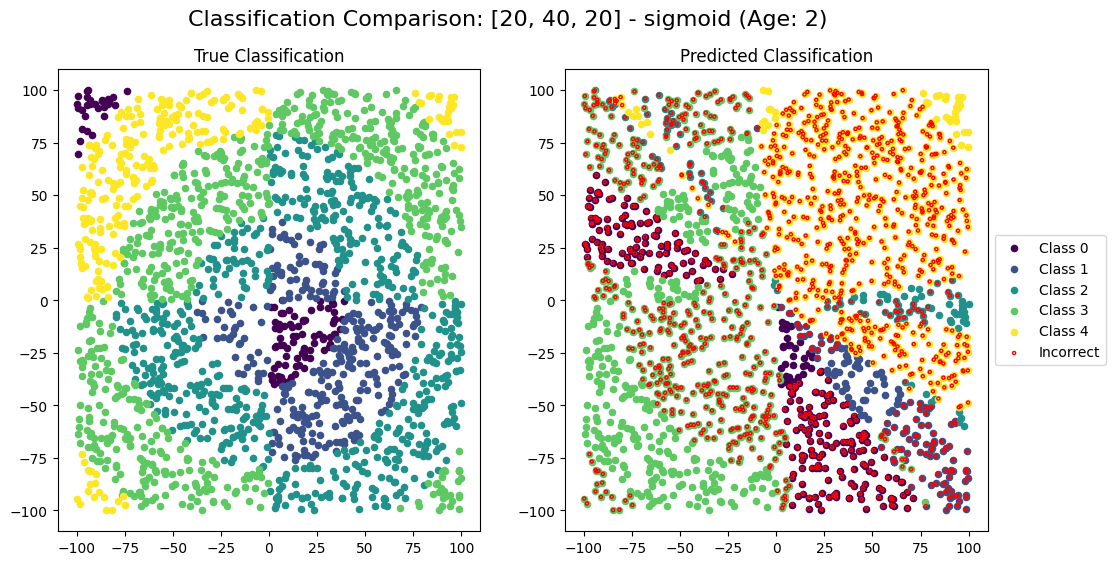

In [44]:
model3.plot_classification_comparison()

In [45]:
train_model(model3)

Training from age 2: (best_loss_test: 0.237675, loss_test: 0.319171): 100%|██████████| 1000/1000 [00:09<00:00, 103.07it/s]


--------------------
Reverting to best model at age 739
Loss on train set: 0.178981	Loss on test set: 0.237675
--------------------
Model training finished at age 739 with loss 0.237675 on test set


Training from age 739: (best_loss_test: 0.169182, loss_test: 0.256356): 100%|██████████| 2000/2000 [00:20<00:00, 99.52it/s] 


--------------------
Reverting to best model at age 2237
Loss on train set: 0.105232	Loss on test set: 0.169182
--------------------
Model training finished at age 2237 with loss 0.169182 on test set


Training from age 2237: (best_loss_test: 0.158575, loss_test: 0.246804): 100%|██████████| 1000/1000 [00:22<00:00, 44.94it/s]


--------------------
Reverting to best model at age 3009
Loss on train set: 0.101011	Loss on test set: 0.158575
--------------------
Model training finished at age 3009 with loss 0.158575 on test set


Training from age 3009: (best_loss_test: 0.102811, loss_test: 0.164423): 100%|██████████| 2000/2000 [00:16<00:00, 124.03it/s]


--------------------
Reverting to best model at age 3638
Loss on train set: 0.052707	Loss on test set: 0.102811
--------------------
Model training finished at age 3638 with loss 0.102811 on test set


Training from age 3638: (best_loss_test: 0.102811, loss_test: 0.209787): 100%|██████████| 1000/1000 [00:12<00:00, 78.09it/s]


--------------------
Reverting to best model at age 3638
Loss on train set: 0.052707	Loss on test set: 0.102811
--------------------
Model training finished at age 3638 with loss 0.102811 on test set


Training from age 3638: (best_loss_test: 0.102811, loss_test: 0.215526): 100%|██████████| 1000/1000 [00:21<00:00, 45.48it/s]

--------------------
Reverting to best model at age 3638
Loss on train set: 0.052707	Loss on test set: 0.102811
--------------------
Model training finished at age 3638 with loss 0.102811 on test set


Model: [20, 40, 20] - sigmoid
Age: 3638
Train Loss: 0.052707
Test Loss: 0.102811
Accuracy: 0.957
F1 Score: 0.957
Model made 1914 / 2000 correct predictions on the test set.
There were 86 incorrect predictions.


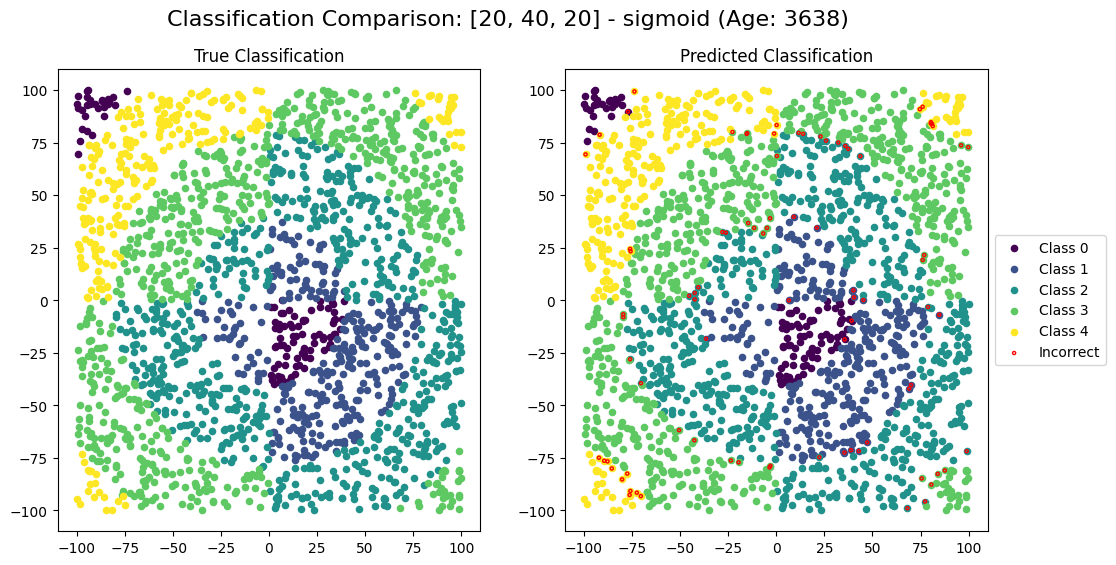

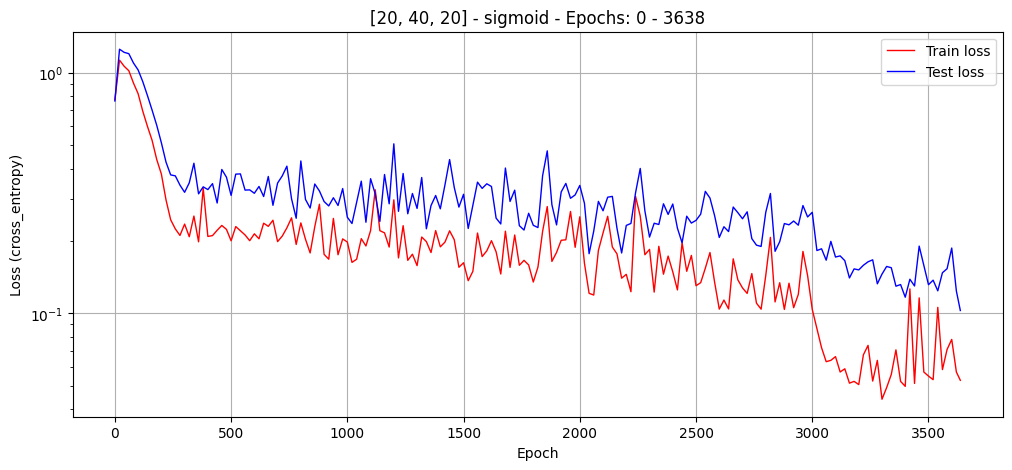

In [46]:
model3.plot_classification_comparison()
model3.plot_history(smoothing_interval=20)

# Conclusions

Models for the dataset "rings5-regular", in terms of performance, could be ranked like this:

`[80] - tanh` < `[40, 40] - tanh` < `[20, 40, 20] - sigmoid`

What is interesting is that the sigmoid model, with the same training, did even better for the rings5 than rings3 dataset. This is especially confusing, because the rings5 dataset is more complex and has 5 label classes.
